In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://github.com/ritvikmath/Time-Series-Analysis/raw/master/ice_cream_vs_heater.csv')

In [3]:
data.head()

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21


In [26]:
data

,heater,ice cream,heater_1d,ice cream_1d
Month,,,,
2004-02-01,18,15,-9.0,2.0
2004-03-01,14,16,-4.0,1.0
2004-04-01,13,19,-1.0,3.0
2004-05-01,13,21,0.0,2.0
2004-06-01,13,24,0.0,3.0
...,...,...,...,...
2020-02-01,34,45,-7.0,2.0
2020-03-01,25,44,-9.0,-1.0
2020-04-01,25,53,0.0,9.0


In [4]:
data['Month']= pd.to_datetime(data['Month'])
data=data.set_index('Month').asfreq('MS')
data.head()

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21


<Axes: xlabel='Month'>

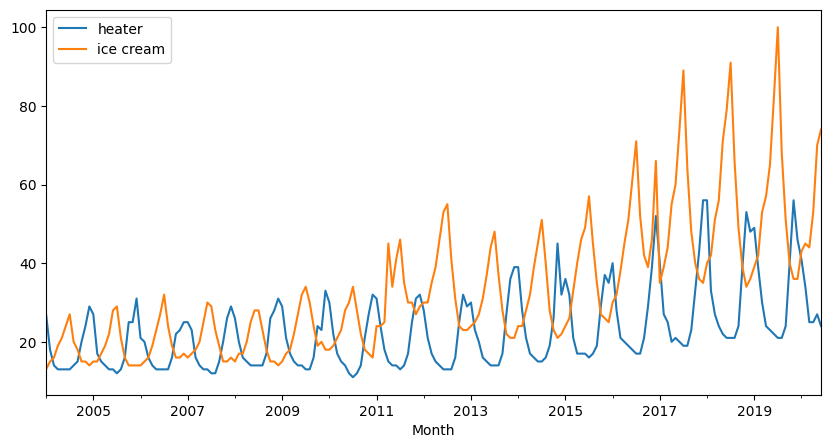

In [5]:
data.plot(figsize=(10,5))

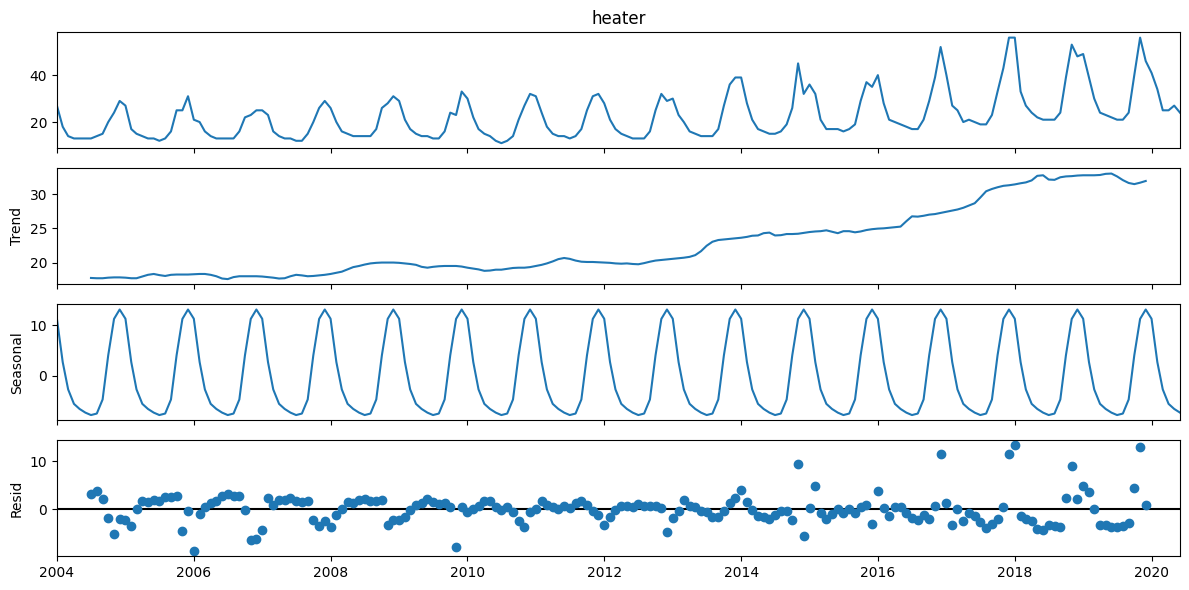

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

etsdecompos = seasonal_decompose(data['heater'])
rcParams['figure.figsize']=(12,6)
etsdecompos.plot();

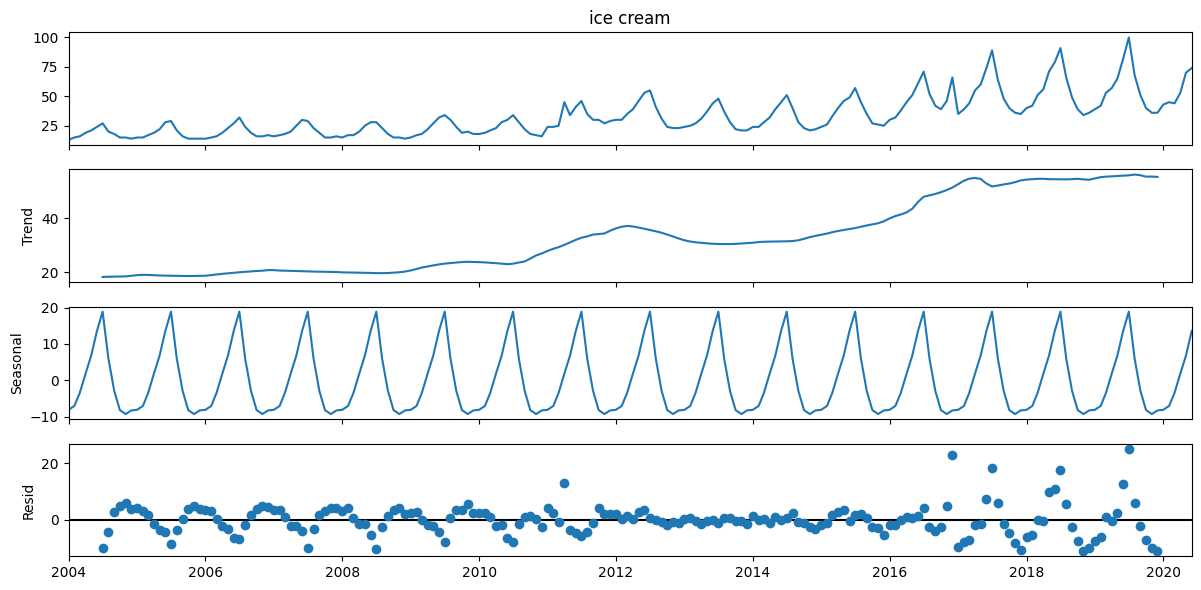

In [7]:
etsdecompos = seasonal_decompose(data['ice cream'])
rcParams['figure.figsize']=(12,6)
etsdecompos.plot();

In [8]:
from statsmodels.tsa.stattools import adfuller

def adfTest(series):

    result = adfuller(series.dropna(), autolag = 'AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4], index = labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [9]:
adfTest(data['heater'])

ADF test statistic        0.950111
p-value                   0.993711
# lags used              11.000000
# observations          186.000000
critical value (1%)      -3.466005
critical value (5%)      -2.877208
critical value (10%)     -2.575122
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is non-stationary


In [10]:
adfTest(data['ice cream'])

ADF test statistic       -0.303933
p-value                   0.924945
# lags used              13.000000
# observations          184.000000
critical value (1%)      -3.466398
critical value (5%)      -2.877380
critical value (10%)     -2.575214
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is non-stationary


In [11]:
from statsmodels.tsa.statespace.tools import diff

data['heater_1d']=diff(data['heater'],k_diff=1)
adfTest(data['heater_1d'])

ADF test statistic     -1.696731e+01
p-value                 9.213802e-30
# lags used             1.000000e+01
# observations          1.860000e+02
critical value (1%)    -3.466005e+00
critical value (5%)    -2.877208e+00
critical value (10%)   -2.575122e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


In [12]:
data['ice cream_1d'] = diff(data['ice cream'],k_diff=1)

adfTest(data['ice cream_1d'])

ADF test statistic       -4.781718
p-value                   0.000059
# lags used              12.000000
# observations          184.000000
critical value (1%)      -3.466398
critical value (5%)      -2.877380
critical value (10%)     -2.575214
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


<Axes: xlabel='Month'>

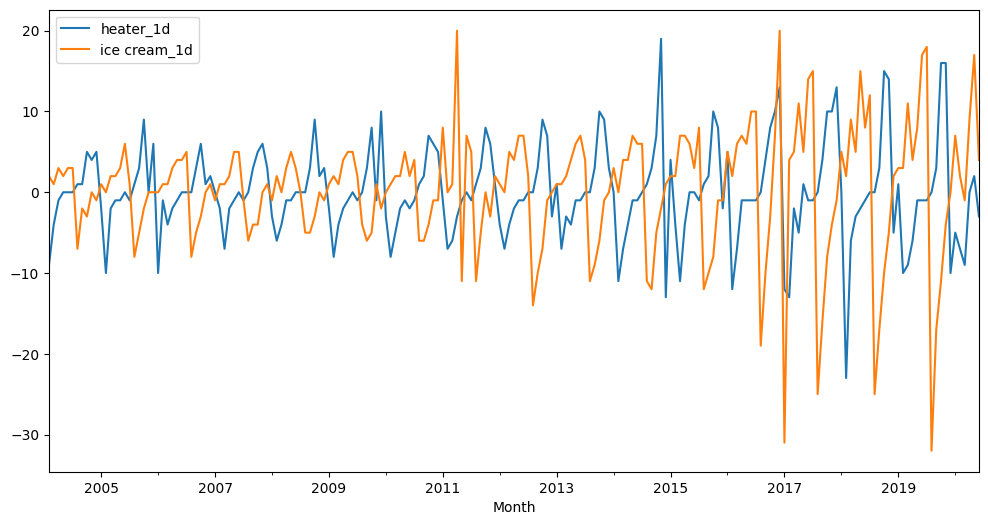

In [13]:
data.dropna(inplace=True)                   # droping the NA value
data1d = data[['heater_1d','ice cream_1d']] #creating new dataframe
data1d.plot(figsize=(12,6))

In [14]:
from statsmodels.tsa.stattools import grangercausalitytests

In [15]:
grangercausalitytests(data1d[['ice cream_1d','heater_1d']],maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.5511  , p=0.0066  , df_denom=193, df_num=1
ssr based chi2 test:   chi2=7.6685  , p=0.0056  , df=1
likelihood ratio test: chi2=7.5222  , p=0.0061  , df=1
parameter F test:         F=7.5511  , p=0.0066  , df_denom=193, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8770  , p=0.0033  , df_denom=190, df_num=2
ssr based chi2 test:   chi2=12.0634 , p=0.0024  , df=2
likelihood ratio test: chi2=11.7049 , p=0.0029  , df=2
parameter F test:         F=5.8770  , p=0.0033  , df_denom=190, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.2104 , p=0.0000  , df_denom=187, df_num=3
ssr based chi2 test:   chi2=34.8901 , p=0.0000  , df=3
likelihood ratio test: chi2=32.0844 , p=0.0000  , df=3
parameter F test:         F=11.2104 , p=0.0000  , df_denom=187, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.2859 , p=0.0000  

{1: ({'ssr_ftest': (7.551077110391374, 0.006566044800152664, 193.0, 1),
   'ssr_chi2test': (7.668451365993312, 0.0056194666494067845, 1),
   'lrtest': (7.522239719495474, 0.0060941862214275245, 1),
   'params_ftest': (7.55107711039136, 0.006566044800152664, 193.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.877031623207034, 0.003337909368969221, 190.0, 2),
   'ssr_chi2test': (12.06338070026707, 0.002401431286205221, 2),
   'lrtest': (11.704948084785883, 0.0028727829719865615, 2),
   'params_ftest': (5.877031623207028, 0.003337909368969221, 190.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (11.210378900522388, 8.467136489898595e-07, 187.0, 3),
   'ssr_chi2test': (34.8900562572408, 1.285177774293816e-07, 3),
   'lrtest': (32.084423351668875, 5.02338570811118e-07, 3),
   'params_ftest': (11.210378900522372, 8.46713648989869e-07, 187.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
    

In [16]:
grangercausalitytests(data1d[['heater_1d','ice cream_1d']],maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.2160 , p=0.0000  , df_denom=193, df_num=1
ssr based chi2 test:   chi2=25.6080 , p=0.0000  , df=1
likelihood ratio test: chi2=24.0679 , p=0.0000  , df=1
parameter F test:         F=25.2160 , p=0.0000  , df_denom=193, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=27.5028 , p=0.0000  , df_denom=190, df_num=2
ssr based chi2 test:   chi2=56.4531 , p=0.0000  , df=2
likelihood ratio test: chi2=49.5801 , p=0.0000  , df=2
parameter F test:         F=27.5028 , p=0.0000  , df_denom=190, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=24.7308 , p=0.0000  , df_denom=187, df_num=3
ssr based chi2 test:   chi2=76.9698 , p=0.0000  , df=3
likelihood ratio test: chi2=64.8249 , p=0.0000  , df=3
parameter F test:         F=24.7308 , p=0.0000  , df_denom=187, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=34.9220 , p=0.0000  

{1: ({'ssr_ftest': (25.216044401622135, 1.1621885968561125e-06, 193.0, 1),
   'ssr_chi2test': (25.60800364102559, 4.183007734677651e-07, 1),
   'lrtest': (24.067900850792512, 9.299767745070145e-07, 1),
   'params_ftest': (25.216044401622153, 1.1621885968560983e-06, 193.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (27.502801558921526, 3.2349719714064726e-11, 190.0, 2),
   'ssr_chi2test': (56.45311898936524, 5.512656962221522e-13, 2),
   'lrtest': (49.58011655833798, 1.7132253161544714e-11, 2),
   'params_ftest': (27.50280155892156, 3.234971971406429e-11, 190.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (24.730835612088057, 1.5971304963149485e-13, 187.0, 3),
   'ssr_chi2test': (76.96976645045588, 1.370452757923576e-16, 3),
   'lrtest': (64.82492397978831, 5.4677497000963764e-14, 3),
   'params_ftest': (24.73083561208803, 1.597130496314971e-13, 187.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1

In [17]:
traindata = data1d.iloc[:-12]
testdata = data1d.iloc[-12:]

In [18]:
from statsmodels.tsa.api import VAR
model = VAR(traindata)
order = model.select_order(15)
print(order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        7.458       7.495       1734.       7.473
1        7.165       7.276       1294.       7.210
2        7.062       7.246       1166.       7.137
3        6.846       7.105       940.7       6.951
4        6.416       6.748       611.4       6.550
5        6.075       6.480       434.8       6.239
6        5.686       6.166       294.9       5.881
7        5.583       6.136       266.1       5.808
8        5.408       6.035       223.5       5.663
9        5.284      5.985*       197.5       5.568
10       5.249       6.024       190.9       5.564
11       5.194       6.043       180.8      5.539*
12      5.191*       6.113      180.4*       5.565
13       5.202       6.199       182.7       5.607
14       5.205       6.275       183.5       5.640
15       5.234       6.377       189.0       5.698
-------------------------------

In [19]:
model = VAR(traindata,freq='MS')
result = model.fit(12)
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     10:19:05
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.07098
Nobs:                     173.000    HQIC:                   5.52936
Log likelihood:          -887.260    FPE:                    174.810
AIC:                      5.15962    Det(Omega_mle):         133.453
--------------------------------------------------------------------
Results for equation heater_1d
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.729887         0.235704            3.097           0.002
L1.heater_1d            -0.707196         0.083411           -8.478           0.000
L1.ice cream_1d         -0.008629         0.

In [20]:
lag = result.k_ar
lag

12

In [21]:
forecast = round(pd.DataFrame(result.forecast(traindata.values[-lag:],
           steps = len(testdata)),index = testdata.index,
           columns=['heater_1d','ice cream_1d']))
forecast

,heater_1d,ice cream_1d
Month,,
2019-07-01,-1.0,-2.0
2019-08-01,3.0,-15.0
2019-09-01,7.0,-11.0
2019-10-01,10.0,-10.0
2019-11-01,10.0,-4.0
2019-12-01,3.0,2.0
2020-01-01,-4.0,1.0
2020-02-01,-10.0,6.0
2020-03-01,-8.0,8.0


In [22]:
forecast["heater_forecasted"] = data["heater"].iloc[-12-1] + forecast['heater_1d'].cumsum()
forecast["ice cream_forecasted"] = data["ice cream"].iloc[-12-1] + forecast['ice cream_1d'].cumsum()
forecast

,heater_1d,ice cream_1d,heater_forecasted,ice cream_forecasted
Month,,,,
2019-07-01,-1.0,-2.0,21.0,80.0
2019-08-01,3.0,-15.0,24.0,65.0
2019-09-01,7.0,-11.0,31.0,54.0
2019-10-01,10.0,-10.0,41.0,44.0
2019-11-01,10.0,-4.0,51.0,40.0
2019-12-01,3.0,2.0,54.0,42.0
2020-01-01,-4.0,1.0,50.0,43.0
2020-02-01,-10.0,6.0,40.0,49.0
2020-03-01,-8.0,8.0,32.0,57.0


,heater_1d,ice cream_1d,heater_forecasted,ice cream_forecasted
Month,,,,
2019-07-01,-1.0,-2.0,21.0,80.0
2019-08-01,3.0,-15.0,24.0,65.0
2019-09-01,7.0,-11.0,31.0,54.0
2019-10-01,10.0,-10.0,41.0,44.0
2019-11-01,10.0,-4.0,51.0,40.0
2019-12-01,3.0,2.0,54.0,42.0
2020-01-01,-4.0,1.0,50.0,43.0
2020-02-01,-10.0,6.0,40.0,49.0
2020-03-01,-8.0,8.0,32.0,57.0


<Axes: xlabel='Month'>

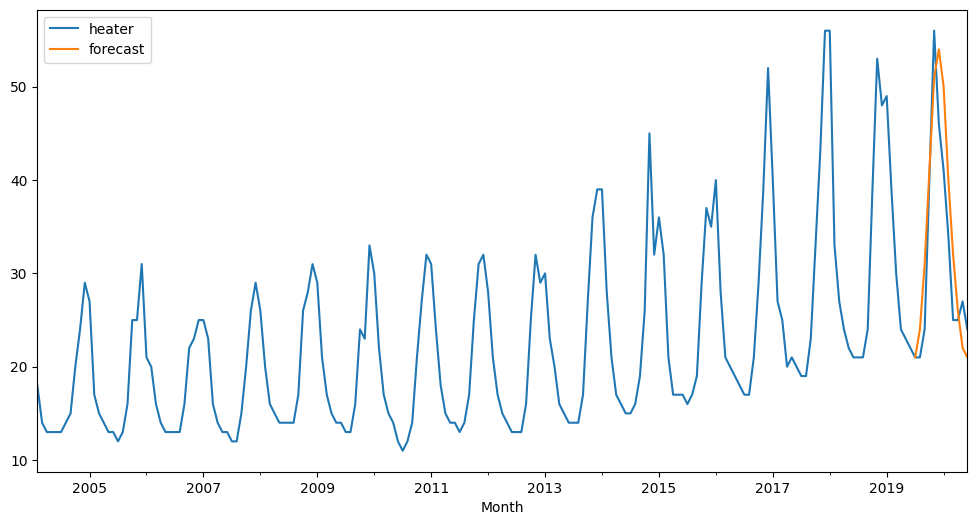

In [24]:
data['heater'].plot(legend = True, label = 'heater', figsize = (12,6)) # Actual Amount
forecast['heater_forecasted'].plot(legend = True, label = 'forecast')  # Forecast amount

<Axes: xlabel='Month'>

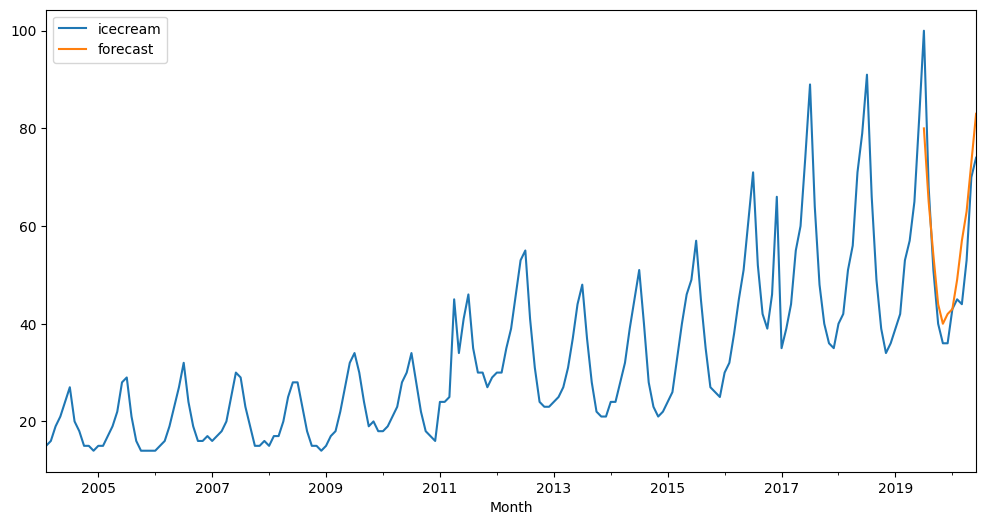

In [25]:
data['ice cream'].plot(legend = True, label = 'icecream', figsize = (12,6)) # Actual Amount
forecast['ice cream_forecasted'].plot(legend = True, label = 'forecast')     # Forecast amount


In [27]:
import joblib
from joblib import dump, load

In [28]:
dump(result, 'var_model.pkl')

['var_model.pkl']

In [29]:
model_1 = load('var_model.pkl')

In [36]:
 st = len(testdata)+24
 prediction = model_1.forecast(traindata.values[-12:],steps =st )

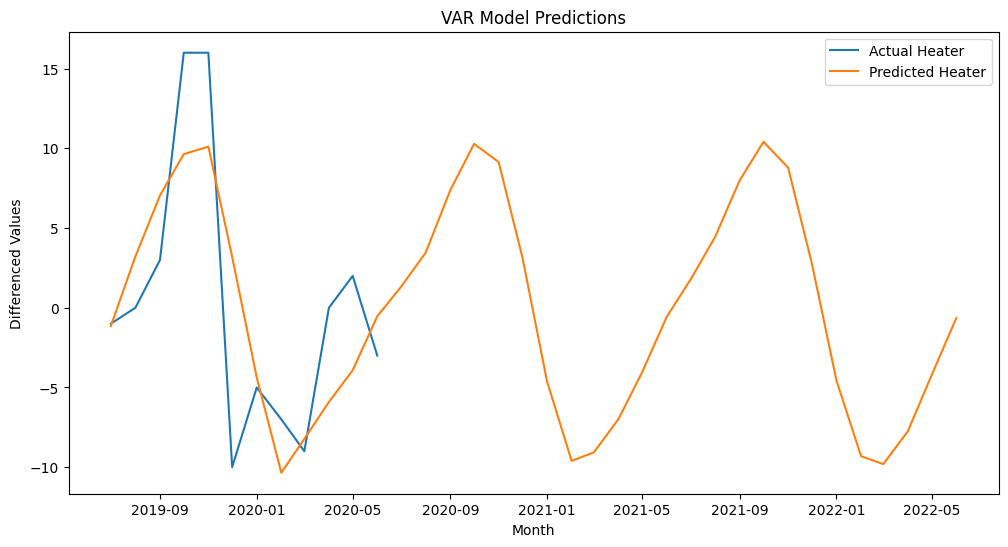

In [39]:
# prompt: plot the prediction above  with adjust the indexing the testdata will be the staring and the ending will st given above

# Adjust the index for the prediction DataFrame
prediction_df = pd.DataFrame(prediction, index=pd.date_range(start=testdata.index[0], periods=st, freq='MS'), columns=['heater_1d_pred', 'ice_cream_1d_pred'])

# Plot the predictions along with the test data
plt.figure(figsize=(12, 6))
plt.plot(testdata['heater_1d'], label='Actual Heater')
plt.plot(prediction_df['heater_1d_pred'], label='Predicted Heater')
# plt.plot(testdata['ice cream_1d'], label='Actual Ice Cream')
# plt.plot(prediction_df['ice_cream_1d_pred'], label='Predicted Ice Cream')
plt.legend()
plt.title('VAR Model Predictions')
plt.xlabel('Month')
plt.ylabel('Differenced Values')
plt.show()
